# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is aksed from you.


ALL THE BEST!

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb


colour = sns.color_palette()

Reading and converting data into a date-time format

In [5]:
df = pd.read_csv('AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


Plot the data:

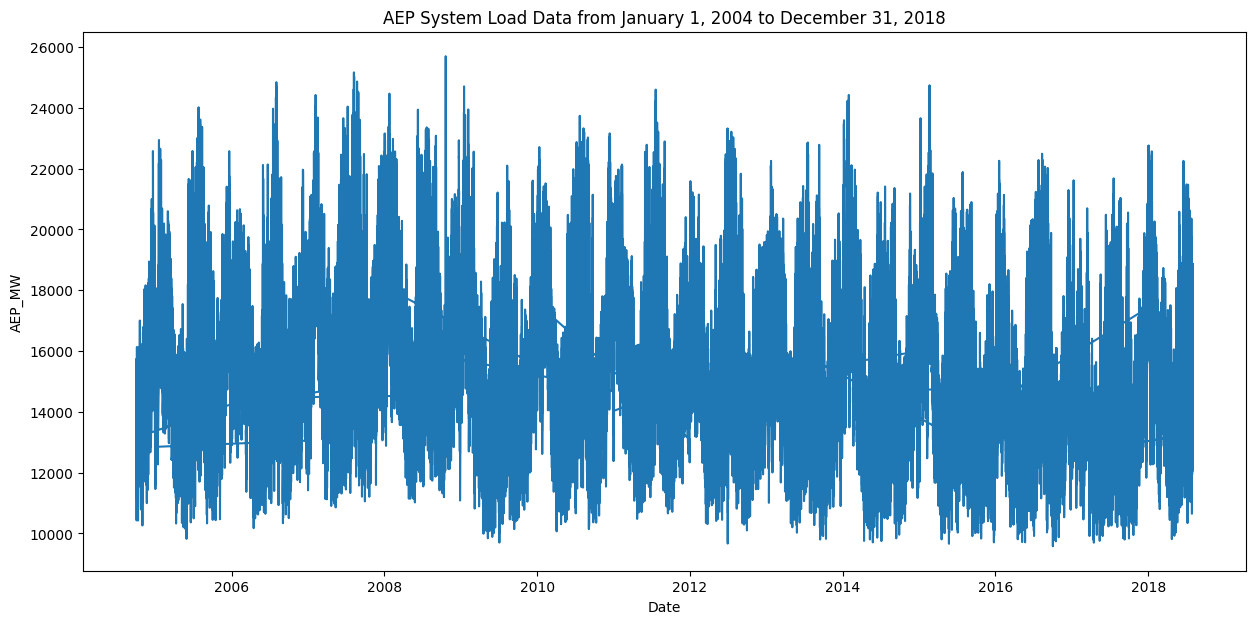

In [6]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(df['AEP_MW'], color=colour[0])
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.title('AEP System Load Data from January 1, 2004 to December 31, 2018')
plt.show()


## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [7]:
train = df.loc[:'2015-12-31']
test = df.loc['2016-01-01':]


plot the train and test data

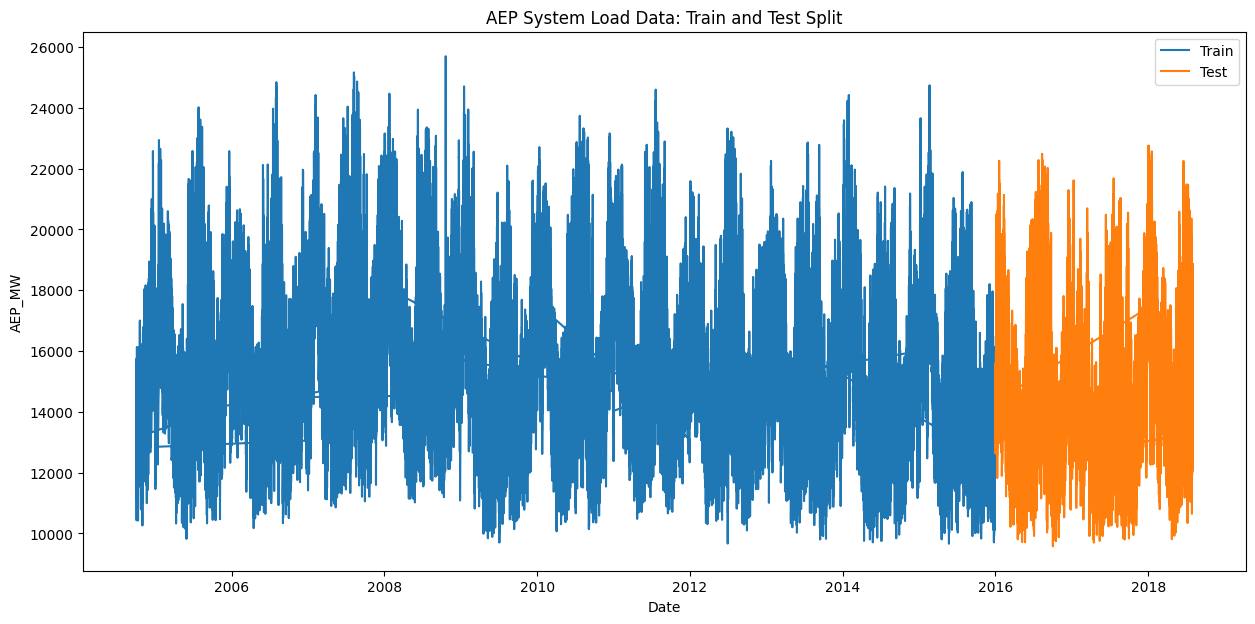

In [8]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(train['AEP_MW'], color=colour[0], label='Train')
plt.plot(test['AEP_MW'], color=colour[1], label='Test')
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.title('AEP System Load Data: Train and Test Split')
plt.legend()
plt.show()


Plot data for a random week AND day, to visualize weekly and daily variations in data

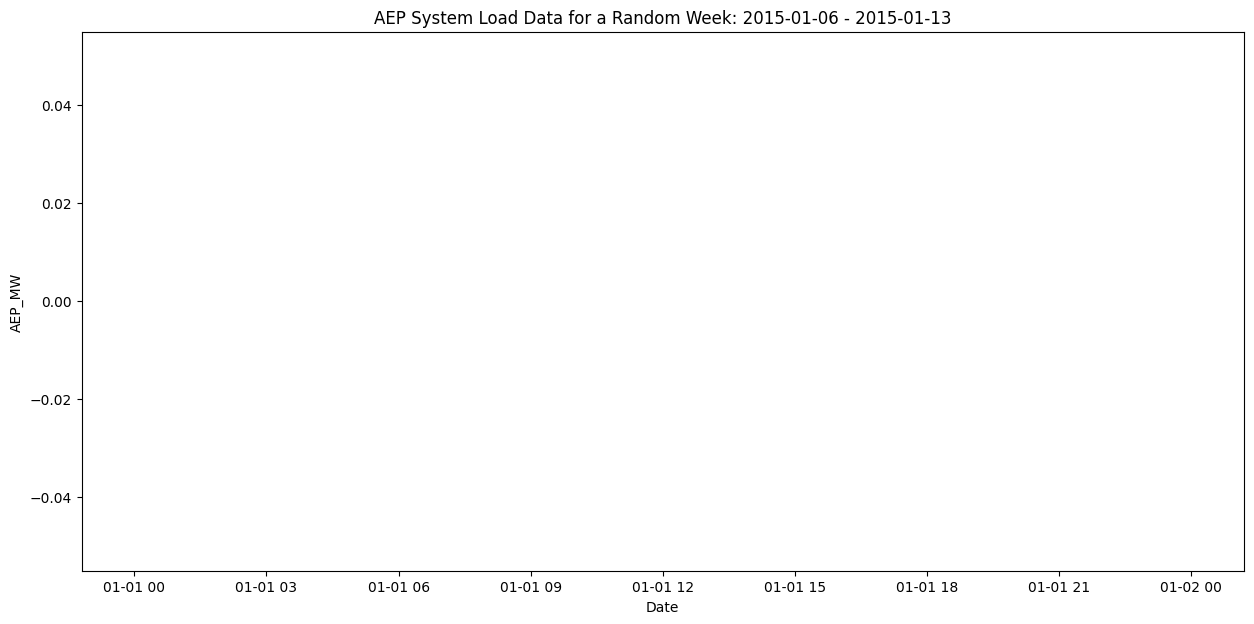

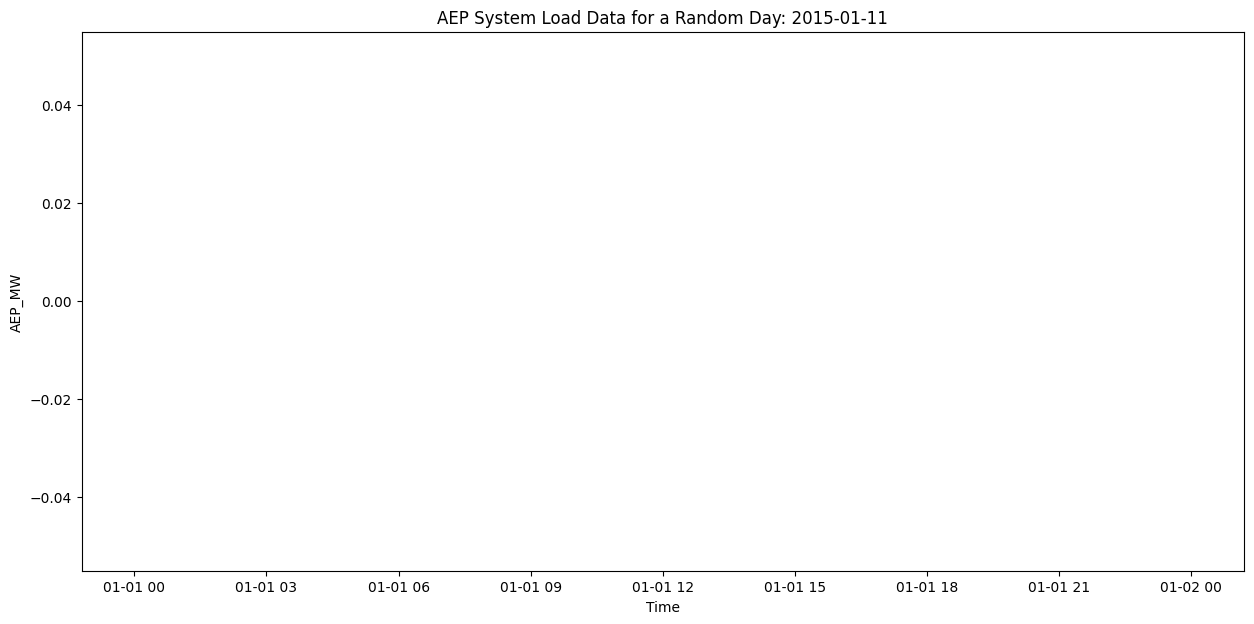

In [10]:
import random
import pandas as pd
import matplotlib.pyplot as plt
# Select a random week
random_week = random.randint(0, len(df) - 7)
start_date = df.index[random_week]
end_date = start_date + pd.Timedelta(days=7)

# Plot the data for the random week
plt.figure(figsize=(15, 7))
plt.plot(df.loc[start_date:end_date]['AEP_MW'], color=colour[0])
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.title(f'AEP System Load Data for a Random Week: {start_date.date()} - {end_date.date()}')
plt.show()

# Select a random day within the random week
random_day = random.randint(0, 6)
selected_date = start_date + pd.Timedelta(days=random_day)

# Plot the data for the random day
plt.figure(figsize=(15, 7))
plt.plot(df.loc[selected_date:selected_date + pd.Timedelta(days=1)]['AEP_MW'], color=colour[1])
plt.xlabel('Time')
plt.ylabel('AEP_MW')
plt.title(f'AEP System Load Data for a Random Day: {selected_date.date()}')
plt.show()


## Feature Creation


Create different features for: hour, day, month, year, week and append it to the data-frame

In [11]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['week'] = df.index.week

df.head()


<ipython-input-11-4d18a8dc1192>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,AEP_MW,hour,day,month,year,week
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,1,31,12,2004,53
2004-12-31 02:00:00,12865.0,2,31,12,2004,53
2004-12-31 03:00:00,12577.0,3,31,12,2004,53
2004-12-31 04:00:00,12517.0,4,31,12,2004,53
2004-12-31 05:00:00,12670.0,5,31,12,2004,53


Make boxplots to depict energy consumption hourly and monthly.(x variable would be hour and month and y variable would be the feature 'AEP_MW'

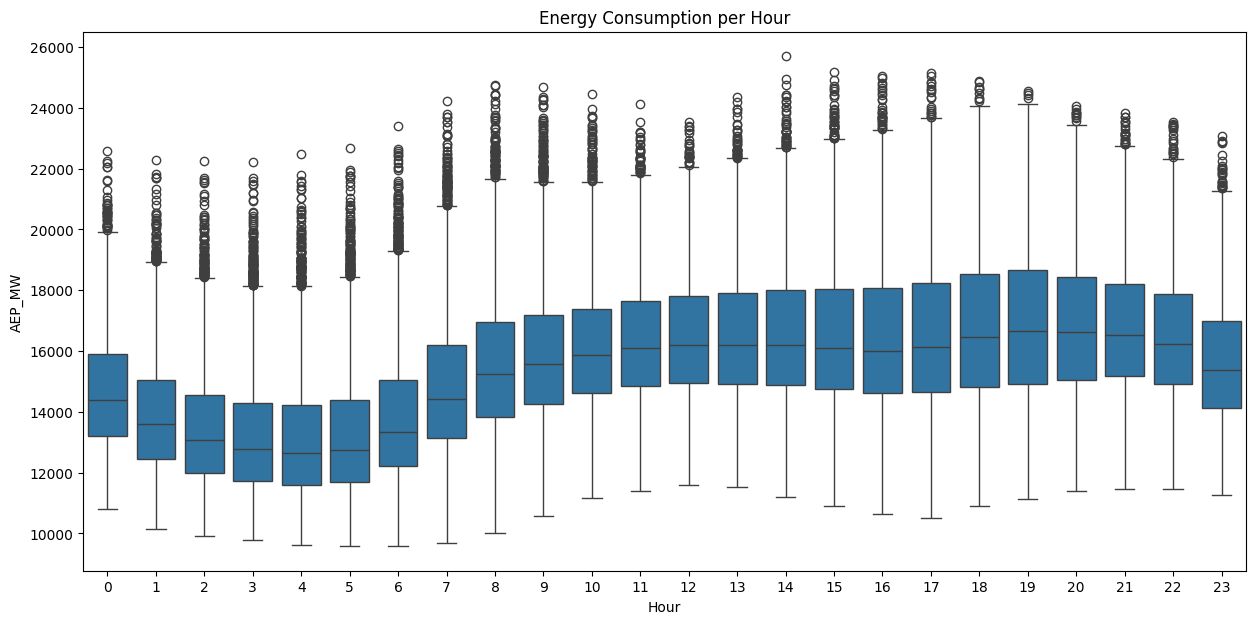

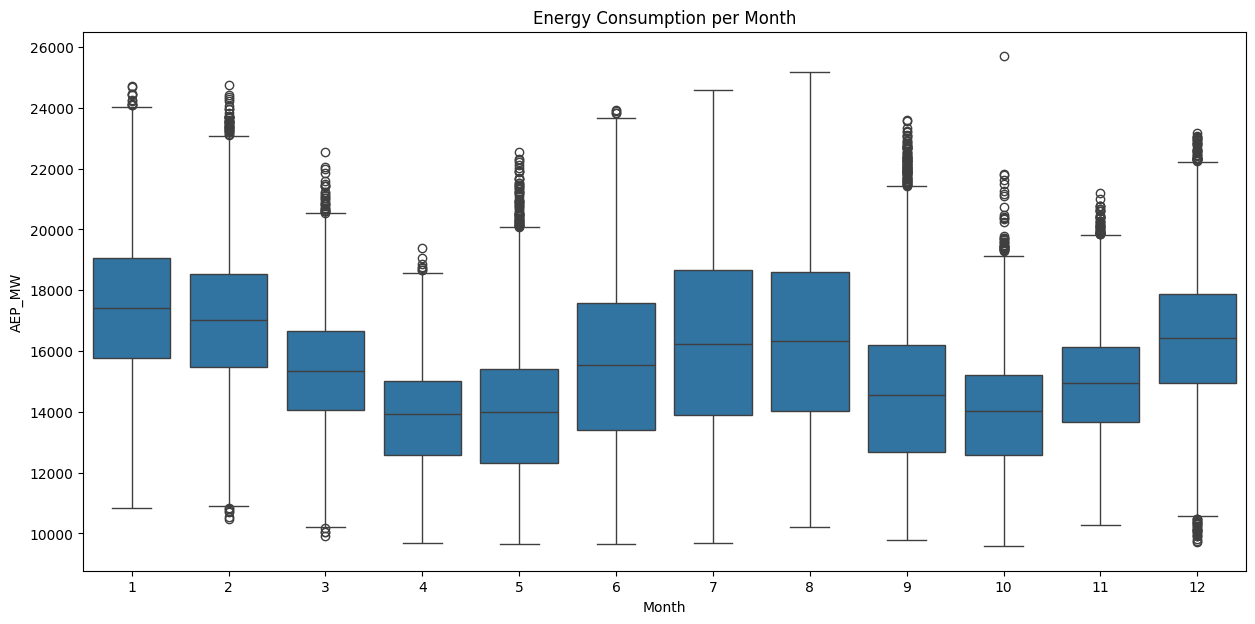

In [12]:
import matplotlib.pyplot as plt
# Boxplot of energy consumption per hour
plt.figure(figsize=(15, 7))
sns.boxplot(x='hour', y='AEP_MW', data=df)
plt.xlabel('Hour')
plt.ylabel('AEP_MW')
plt.title('Energy Consumption per Hour')
plt.show()

# Boxplot of energy consumption per month
plt.figure(figsize=(15, 7))
sns.boxplot(x='month', y='AEP_MW', data=df)
plt.xlabel('Month')
plt.ylabel('AEP_MW')
plt.title('Energy Consumption per Month')
plt.show()


In [13]:
df

,AEP_MW,hour,day,month,year,week
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,1,31,12,2004,53
2004-12-31 02:00:00,12865.0,2,31,12,2004,53
2004-12-31 03:00:00,12577.0,3,31,12,2004,53
2004-12-31 04:00:00,12517.0,4,31,12,2004,53
2004-12-31 05:00:00,12670.0,5,31,12,2004,53
...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,1,1,2018,1
2018-01-01 21:00:00,20999.0,21,1,1,2018,1
2018-01-01 22:00:00,20820.0,22,1,1,2018,1


In [14]:
X=df[['hour','day','month','year','week']]
y=df['AEP_MW']


RMSE: 1779.6882008917023


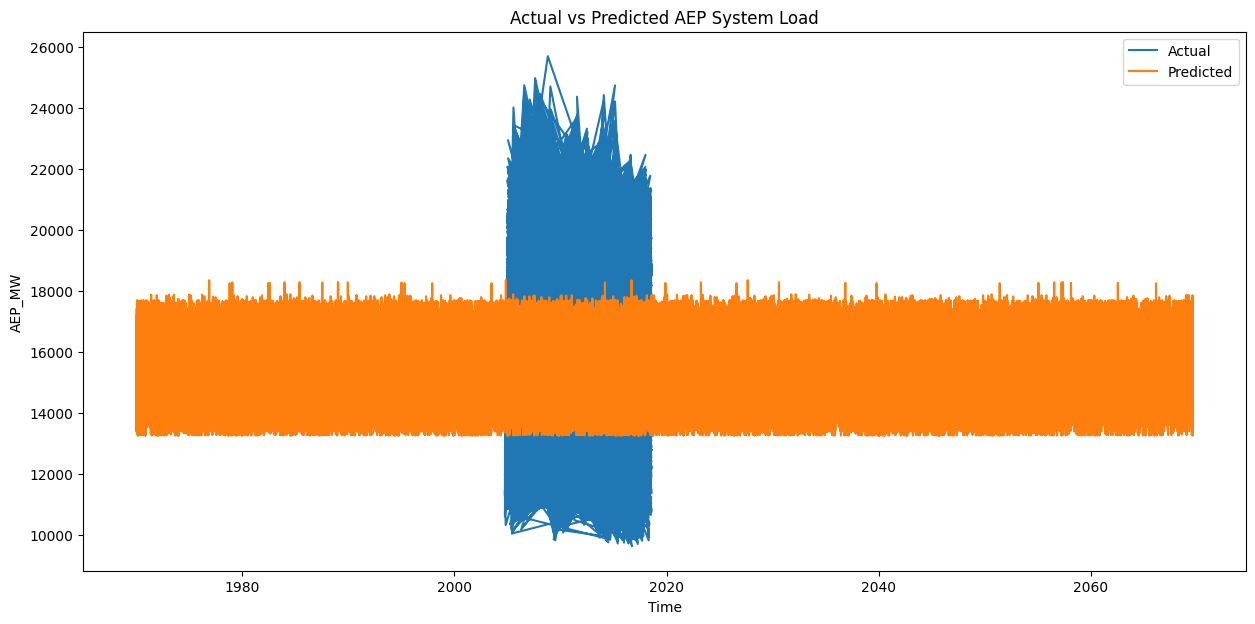

In [15]:
# prompt: train and test the data
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.01)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Plot the actual and predicted values
plt.figure(figsize=(15, 7))
plt.plot(y_test, color=colour[0], label='Actual')
plt.plot(y_pred, color=colour[1], label='Predicted')
plt.xlabel('Time')
plt.ylabel('AEP_MW')
plt.title('Actual vs Predicted AEP System Load')
plt.legend()
plt.show()


## Model Creation andEestimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learnning rate as 0.01

In [16]:


import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
# Create an XGBoost regressor model
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)

In [18]:
# Fit the model on the training data
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
# Make predictions on the test data
predictions = model.predict(X_test)

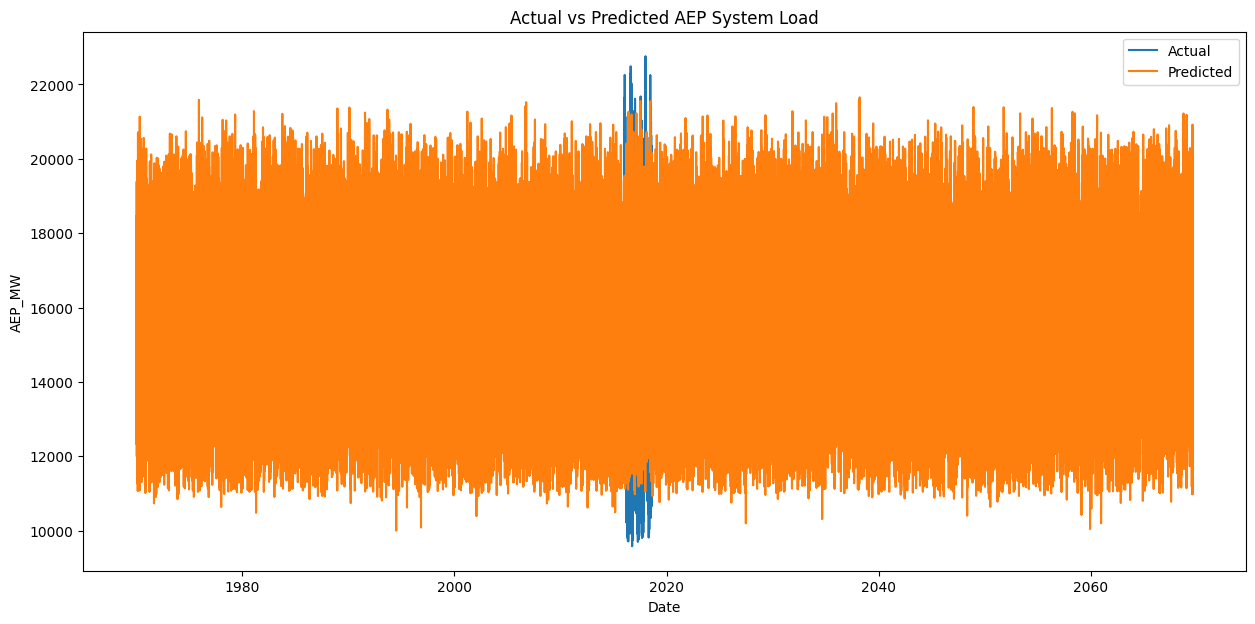

In [20]:
# Plot the actual and predicted values
plt.figure(figsize=(15, 7))
plt.plot(test['AEP_MW'], color=colour[0], label='Actual')
plt.plot(predictions, color=colour[1], label='Predicted')
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.title('Actual vs Predicted AEP System Load')
plt.legend()
plt.show()


Predict values for the testing set using the model and plot them

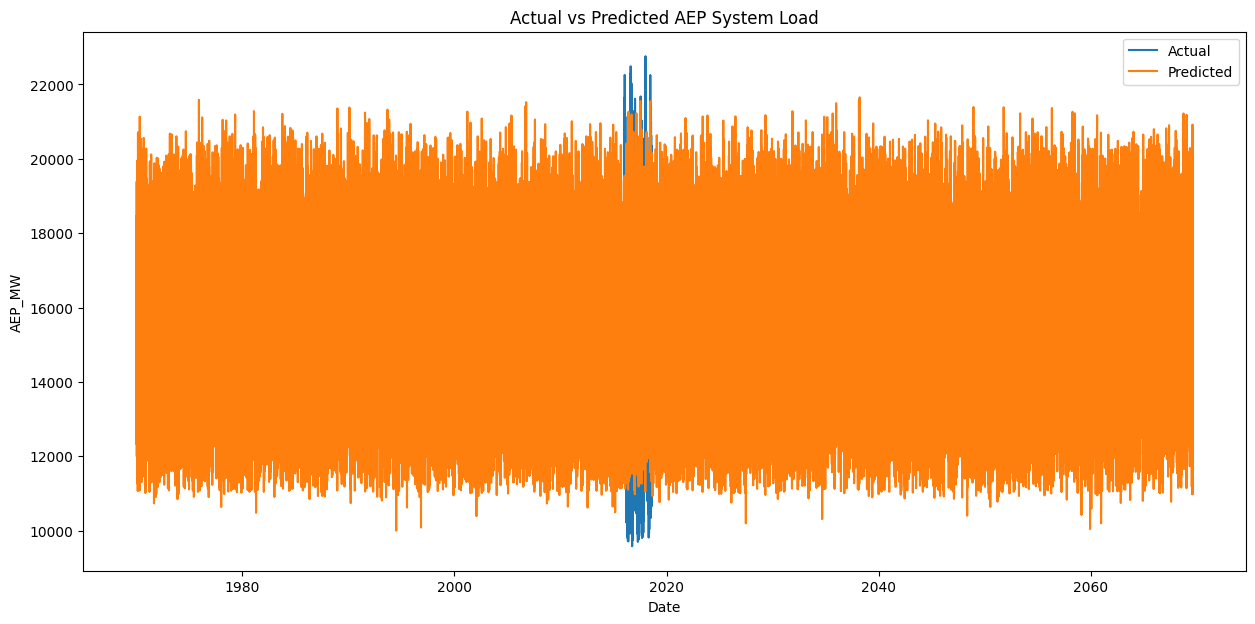

In [21]:
# prompt: Predict values for the testing set using the model and plot them

import matplotlib.pyplot as plt
# Predict values for the testing set using the model


# Plot the actual and predicted values
plt.figure(figsize=(15, 7))
plt.plot(test['AEP_MW'], color=colour[0], label='Actual')
plt.plot(predictions, color=colour[1], label='Predicted')
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.title('Actual vs Predicted AEP System Load')
plt.legend()
plt.show()


Use RMSE to find out the accuracy of your model

Find the importance of each feature use